### Michael week 2 -> Nina week 3

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rich import print
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

cwd = os.path.join(os.getcwd(), 'data')
result_path = os.path.join(os.getcwd(), 'results')

### Load Data:

In [2]:
# load dataframe
df_michael = pd.read_csv(os.path.join(cwd, 'week2', 'labeled', 'michael_wk2.csv'))
df_nina = pd.read_csv(os.path.join(cwd, 'week3', 'labeled', 'nina_wk3.csv'))

In [3]:
df_nina

,encoded_unique_ticker_ts,rid,text,question,response,label,note
0,89028.0,389277.0,Does it require you to change the types of req...,"Good morning, thank you. I guess I'll continue...","Well, I think it does a number of things, but ...",1.0,further context implies skepticism for the nex...
1,81192.0,13981.0,So obviously I think the guidance is anything ...,"Okay, sure. So obviously I think the guidance ...","Yes, now listen as guided, I mean we are conti...",0.0,NaN
2,31171.0,723606.0,And is your sense that they will get to a poin...,"Yes, okay. That's very good color, and I appre...",Over the longer haul I think that that maybe p...,0.0,NaN
3,64119.0,886290.0,"Was that a competitive deal, and if it was, we...","I would like to go back to the one deal, the s...","So Steve pardon my poor English there, it wasn...",0.0,NaN
4,75857.0,234259.0,"So with the World Cup, think you said that ARP...","I'd like to just ask 2 questions: one, just to...","Thank you, Paul. And just starting with your f...",0.0,NaN
...,...,...,...,...,...,...,...
196,3061.0,1162044.0,"If you look at the remainder of the year, Bill...",Okay. If you look at the remainder of the year...,"Well, as I said, I think that, first of all, t...",1.0,skeptucal to why they are positive if the numb...
197,79527.0,912400.0,"In your Consumer Brands business, did the Vals...","Hi. In your Consumer Brands business, did the ...","Well, let me take a stab at this Jeff and say ...",0.0,NaN
198,42818.0,778112.0,"Just to clarify, the $15 million combined betw...","Yes. Just to clarify, the $15 million combined...","Yes, I think when we look at it over the year,...",0.0,NaN
199,11703.0,960031.0,Very good.,"Very good. And then final question, and I'll s...","Yes, we have actually kept loan pricing very s...",0.0,NaN


In [4]:
df_michael

,encoded_unique_ticker_ts,rid,text,question,response,label,note
0,89028,389277,Does it require you to change the types of req...,"Good morning, thank you. I guess I'll continue...","Well, I think it does a number of things, but ...",0,"Just a question, an explanation can be given."
1,81192,13981,So obviously I think the guidance is anything ...,"Okay, sure. So obviously I think the guidance ...","Yes, now listen as guided, I mean we are conti...",0,"Agreement between both parties, so no outright..."
2,31171,723606,And is your sense that they will get to a poin...,"Yes, okay. That's very good color, and I appre...",Over the longer haul I think that that maybe p...,0,Just a question that requires an explanation.
3,64119,886290,"Was that a competitive deal, and if it was, we...","I would like to go back to the one deal, the s...","So Steve pardon my poor English there, it wasn...",1,Hint of skepticism as they are asking if the d...
4,75857,234259,"So with the World Cup, think you said that ARP...","I'd like to just ask 2 questions: one, just to...","Thank you, Paul. And just starting with your f...",0,Question seems to just require confirmation.
...,...,...,...,...,...,...,...
195,19546,1219012,So could you clarify whether is it that the ca...,Basically in the past and we know that the fac...,Well the oral care organic sales were better t...,1,There may be a little skepticism as they are i...
196,3061,1162044,"If you look at the remainder of the year, Bill...",Okay. If you look at the remainder of the year...,"Well, as I said, I think that, first of all, t...",1,"Inquiring about a change, that is deflected by..."
197,79527,912400,"In your Consumer Brands business, did the Vals...","Hi. In your Consumer Brands business, did the ...","Well, let me take a stab at this Jeff and say ...",0,Just a question that seemingly asks about perf...
198,42818,778112,"Just to clarify, the $15 million combined betw...","Yes. Just to clarify, the $15 million combined...","Yes, I think when we look at it over the year,...",0,Seems as if it is just a logisticial question.


### Check nan:

In [5]:
# check nan: michael
print(df_michael.iloc[:, 5].isnull().sum())
print(np.argmax(df_michael.iloc[:, 5].isnull()))

0

0

In [6]:
# check nan: nina
print(df_nina.iloc[:, 5].isnull().sum())
print(np.argmax(df_nina.iloc[:, 5].isnull()))

1

200

In [7]:
df_nina.drop(inplace=True, axis=1, index=np.argmax(df_nina.iloc[:, 3].isnull()))

### Check two df before merging:

In [8]:
np.where(~(df_nina['text'] == df_michael['text']))

(array([  5,  20,  21,  28,  29,  30,  52,  61,  84, 126, 129, 139, 140,
        146, 150, 159, 171, 193, 195]),)

In [9]:
for i in np.where(~(df_nina['text'] == df_michael['text']))[0]:
    print(df_michael.iloc[i]['text'])
    print('*' * 50)
    print(df_nina.iloc[i]['text'])
    print('&' * 50)

Iâm just curious a quarter end to these changes; if your expectations have changed, I mean 
what you are seeing other competitors in the marketplace do, what has been kind of customer 
reaction, but sort of whatâs you are seeing from the fee uptick?

**************************************************

I???m just curious a quarter end to these changes; if your expectations have changed, I mean 
what you are seeing other competitors in the marketplace do, what has been kind of customer 
reaction, but sort of what???s you are seeing from the fee uptick?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Right, but your security VAS 50% to 27% has got a long way to go to offsetting the declines 
in the 75% of your business thatâs not VAS.

**************************************************

Right, but your security VAS 50% to 27% has got a long way to go to offsetting the declines 
in the 75% of your business that???s not VAS.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

And I donât know maybe there are some things there that youâve got from this or maybe this
one just didnât work for other unique reasons.

**************************************************

And I don???t know maybe there are some things there that you???ve got from this or maybe 
this one just didn???t work for other unique reasons.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Paul, just your comments regarding Street estimates for EPS and not taking into account maybe
higher operating cost, I understand that, but can you maybe comment on and I know this is 
probably a little bit more difficult to comment on, but on the revenue side, I mean, if you 
look at consensus estimates, itâs around mid single-digit revenue growth over the next say 
four quarters.

**************************************************

Paul, just your comments regarding Street estimates for EPS and not taking into account maybe
higher operating cost, I understand that, but can you maybe comment on and I know this is 
probably a little bit more difficult to comment on, but on the revenue side, I mean, if you 
look at consensus estimates, it???s around mid single-digit revenue growth over the next say 
four quarters.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

First Matt, can you help us get to an appropriate gross margin and SG&A run rate before 
layering in Questcor I know thatâs a multifaceted question but I know you will try to be 
helpful on those moving parts?

**************************************************

First Matt, can you help us get to an appropriate gross margin and SG&A run rate before 
layering in Questcor I know that???s a multifaceted question but I know you will try to be 
helpful on those moving parts?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Going back to your pitch at the end of your prepared remarks about the stock price, if I were
to kind of a devilâs advocate or think about the things that maybe would be offset to that.

**************************************************

Going back to your pitch at the end of your prepared remarks about the stock price, if I were
to kind of a devil???s advocate or think about the things that maybe would be offset to that.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

I just wanted to ask you a question about your international business since itâs starting to
expand very meaningfully here.

**************************************************

I just wanted to ask you a question about your international business since it???s starting 
to expand very meaningfully here.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

So Iâm just try to reconcile sort of the - what Iâll call little bit of a slowdown and 
realize in curve Q1 against your comments youâre going to be aggressive on rate growth as we
get here into the peak season.

**************************************************

So I???m just try to reconcile sort of the - what I???ll call little bit of a slowdown and 
realize in curve Q1 against your comments you???re going to be aggressive on rate growth as 
we get here into the peak season.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Thatâs very helpful.

**************************************************

That???s very helpful.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Youâve been very focused on in this three-prong strategy.

**************************************************

You???ve been very focused on in this three-prong strategy.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

So itâs kind of all-in, what do you think the impact was to your EPS both before and after 
unusable items?

**************************************************

So it???s kind of all-in, what do you think the impact was to your EPS both before and after 
unusable items?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In light of some of the strength youâre seeing, I guess where is the big offset thatâs 
causing velocity to decline so rapidly?

**************************************************

In light of some of the strength you???re seeing, I guess where is the big offset that???s 
causing velocity to decline so rapidly?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

It sound like you might be having a bit of a trouble on your end, as well just given the 
reports that arenât being provided at this point in time?

**************************************************

It sound like you might be having a bit of a trouble on your end, as well just given the 
reports that aren???t being provided at this point in time?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Iâm not sure what data you can give.

**************************************************

I???m not sure what data you can give.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

I realize the focus on metallurgy is important during this transition zone phase but given 
the tonnage and grade guidance you guys gave us this quarter, the implied recoveries that Iâm
calculating, seem to be low -- kind of in the low to mid 60% range.

**************************************************

I realize the focus on metallurgy is important during this transition zone phase but given 
the tonnage and grade guidance you guys gave us this quarter, the implied recoveries that 
I???m calculating, seem to be low -- kind of in the low to mid 60% range.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Yes, itâs a two-part question.

**************************************************

Yes, it???s a two-part question.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

So, if you hadnât refinanced and therefore if you included the $3.7 million of fees what 
would the revised earnings guidance look like?

**************************************************

So, if you hadn???t refinanced and therefore if you included the $3.7 million of fees what 
would the revised earnings guidance look like?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

Itâs definitely an exciting initiative for you.

**************************************************

It???s definitely an exciting initiative for you.

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

So could you clarify whether is it that the category weâre seeing negative mix because of the
price increases or actual volumes have slowdown?

**************************************************

So could you clarify whether is it that the category we???re seeing negative mix because of 
the price increases or actual volumes have slowdown?

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [10]:
np.all(df_michael['rid'] == df_nina['rid'])

True

### Merge df:

In [11]:
merge_df = pd.merge(df_michael[['rid', 'text', 'label']], df_nina[['rid', 'label']], on='rid', suffixes=('_michael', '_nina'))
merge_df

,rid,text,label_michael,label_nina
0,389277,Does it require you to change the types of req...,0,1.0
1,13981,So obviously I think the guidance is anything ...,0,0.0
2,723606,And is your sense that they will get to a poin...,0,0.0
3,886290,"Was that a competitive deal, and if it was, we...",1,0.0
4,234259,"So with the World Cup, think you said that ARP...",0,0.0
...,...,...,...,...
195,1219012,So could you clarify whether is it that the ca...,1,1.0
196,1162044,"If you look at the remainder of the year, Bill...",1,1.0
197,912400,"In your Consumer Brands business, did the Vals...",0,0.0
198,778112,"Just to clarify, the $15 million combined betw...",0,0.0


### Kappa score:

In [12]:
kapp_score = cohen_kappa_score(merge_df['label_michael'], merge_df['label_nina'])
print(kapp_score)

0.37247394171452874

### Confusion Matrix:

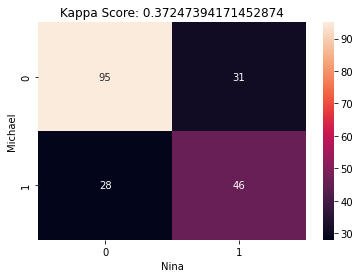

In [13]:
cm = confusion_matrix(merge_df['label_michael'], merge_df['label_nina'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
plt.title(f'Kappa Score: {kapp_score}')
ax.set_xlabel('Nina')
ax.set_ylabel('Michael')
plt.savefig(os.path.join(result_path, 'week2', 'michael&nina.png'), dpi=500)